<a href="https://colab.research.google.com/github/gfi1ippou/mmm/blob/main/Finally_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
data = pd.read_csv('/content/mta.data - Sheet2 (2).csv')
data.head()

,Date,FB.Impressions,google.generic.search.impressions,google.BRAND.search.impressions,YT.search.impressions,PMX.search.impressions
0,1/1/2024,0,2555,"5,993","44,553","1,986"
1,2/1/2024,0,"2,929","6,120","43,619","4,375"
2,3/1/2024,0,2387,"6,054","41,659","2,892"
3,4/1/2024,0,"2,641","5,830","39,761","3,199"
4,5/1/2024,0,1591,"5,697","41,200","2,255"


Simulated data


In [6]:
pip install tigramite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 4.6 MB/s eta 0:00:00


In [7]:
!pip install dcor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00


In [20]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [35]:
import pandas as pd

df = pd.read_csv('/content/mta.data - Sheet2 (2).csv')

In [40]:
df.columns

Index(['Date', 'FB.Impressions', 'google.generic.search.impressions',
       'google.BRAND.search.impressions', 'YT.search.impressions',
       'PMX.search.impressions'],
      dtype='object')

In [41]:
# Assuming you've already loaded and cleaned data as 'data_array'
var_names = [fr'$X^{i}$' for i in range(data_array.shape[1])]
datatime = {0: np.arange(data_array.shape[0])}

dataframe = pp.DataFrame(data_array,
                         datatime=datatime,
                         var_names=var_names)




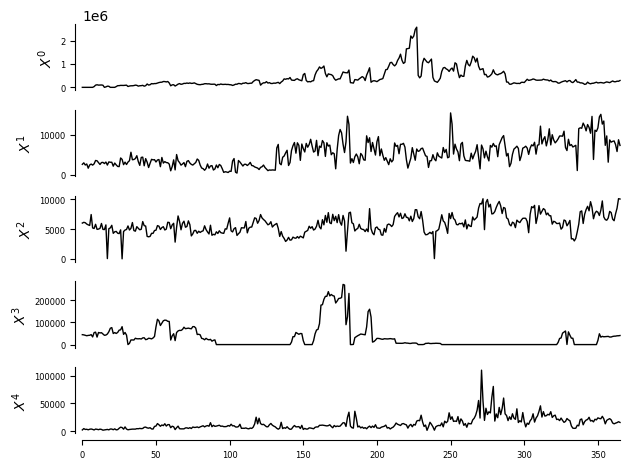

In [42]:
tp.plot_timeseries(dataframe); plt.show()


In [44]:
import numpy as np
import pandas as pd

# Step 1: Drop 'Date' and clean numeric columns (remove commas, convert to float)
df_numeric = df.drop(columns=["Date"]).apply(
    lambda col: col.astype(str).str.replace(",", "").str.strip()
).astype(float)

# Step 2: Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Step 3: Create NumPy array
data_array = df_numeric.to_numpy()

# Step 4: Keep actual column names as variable names
var_names = list(df_numeric.columns)

# Step 5: Parse date correctly using day-first format
date_series = pd.to_datetime(df.loc[df_numeric.index, "Date"], dayfirst=True)

# Step 6: Package result
cleaned_output = {
    "data": data_array,
    "var_names": var_names,
    "datatime": {"Date": date_series},
    "shape": data_array.shape
}

# Step 7: Print summary
print("Shape:", cleaned_output["shape"])
print("Variables:", cleaned_output["var_names"])
print("Date range:", cleaned_output["datatime"]["Date"].min(), "→", cleaned_output["datatime"]["Date"].max())


Shape: (366, 5)
Variables: ['FB.Impressions', 'google.generic.search.impressions', 'google.BRAND.search.impressions', 'YT.search.impressions', 'PMX.search.impressions']
Date range: 2024-01-01 00:00:00 → 2024-12-31 00:00:00


In [45]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=parcorr,
    verbosity=1)



##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


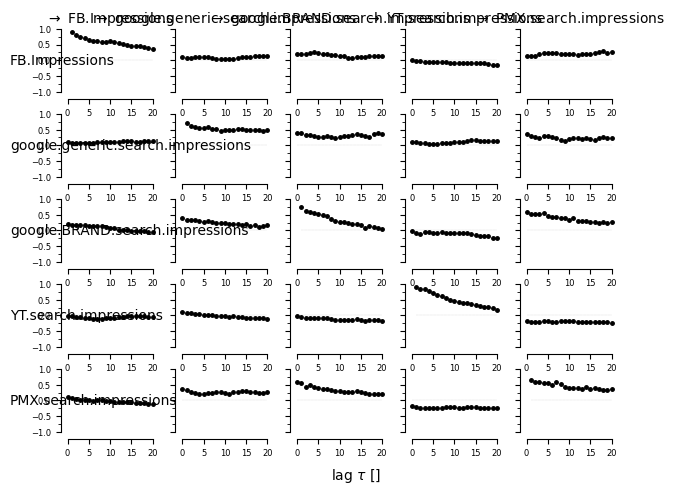

In [50]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations,
                                   setup_args={'var_names':var_names,
                                   'x_base':5, 'y_base':.5}); plt.show()


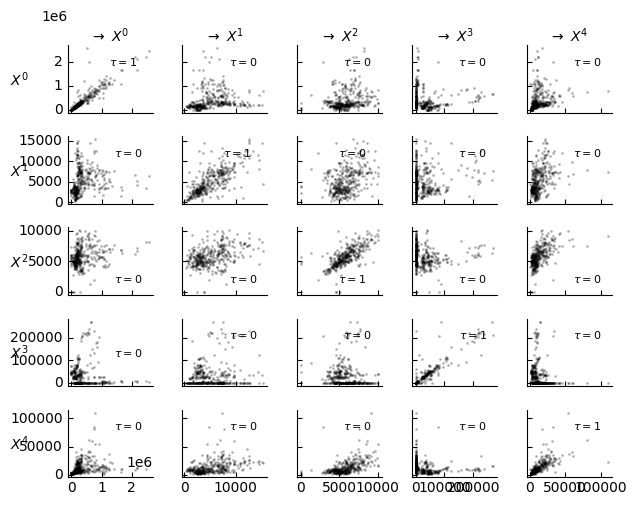

In [55]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()


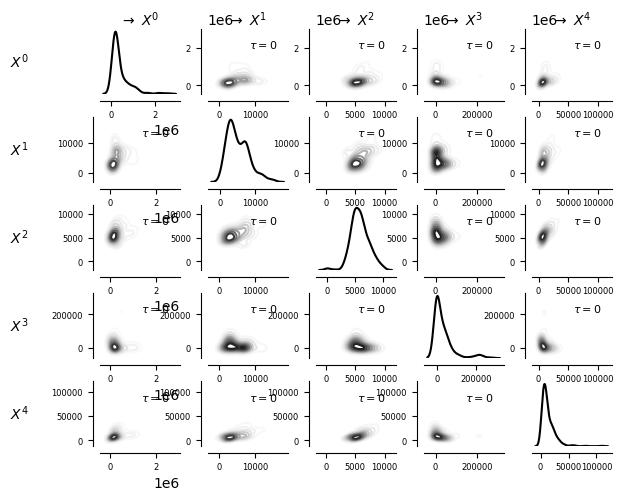

In [56]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()


In [58]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None, alpha_level=0.01)



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 4 link(s):
    [pc_alpha = 0.2]
        ($X^0$ -1): max_pval = 0.00000, |min_val| =  0.706
        ($X^0$ -2): max_pval = 0.13108, |min_val| =  0.081
        ($X^1$ -7): max_pval = 0.13528, |min_val| =  0.080
        ($X^4$ -2): max_pval = 0.19709, |min_val| =  0.069

    Variable $X^1$ has 5 link(s):
    [pc_alpha = 0.2]
        ($X^1$ -1): max_pval = 0.00000, |min_val| =  0.445
        ($X^1$ -3): max_pval = 0.01112, |min_val| =  0.136
        ($X^1$ -6): max_pval = 0.02563, |min_val| =  0.120
        ($X^4$ -8): max_pval = 0.08073, |min_val| =  0.094
        ($X^1$ -5): max_pval = 0.10942, |min_val| =  0.086

    Variable $X^2$ has 10 link(s):
    [pc_alpha = 0.3]
        ($X^2$ -1): max_pval = 0.00000, |m

In [52]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.027 0.916 0.013 0.606 0.26  0.225 0.409]
  [0.032 0.33  0.594 0.966 0.519 0.758 0.448 0.114 0.92 ]
  [0.059 0.289 0.238 0.118 0.704 0.737 0.983 0.728 0.062]
  [0.009 0.362 0.785 0.158 0.347 0.763 0.963 0.721 0.802]
  [0.315 0.866 0.067 0.119 0.449 0.825 0.284 0.855 0.048]]

 [[0.032 0.187 0.77  0.461 0.906 0.184 0.969 0.129 0.5  ]
  [1.    0.    0.351 0.007 0.966 0.219 0.108 0.739 0.724]
  [0.007 0.161 0.376 0.378 0.53  0.052 0.821 0.835 0.531]
  [0.001 0.023 0.59  0.3   0.01  0.846 0.582 0.457 0.397]
  [0.    0.76  0.587 0.506 0.226 0.045 0.778 0.588 0.052]]

 [[0.059 0.289 0.455 0.496 0.045 0.609 0.764 0.537 0.602]
  [0.007 0.306 0.842 0.089 0.82  0.234 0.77  0.313 0.19 ]
  [1.    0.    0.214 0.066 0.419 0.285 0.137 0.232 0.326]
  [0.004 0.511 0.001 0.    0.324 0.672 0.819 0.844 0.782]
  [0.    0.2   0.598 0.43  0.007 0.31  0.163 0.129 0.355]]

 [[0.009 0.215 0.835 0.693 0.875 0.937 0.324 0.372 0.628]
  [0.001 0.413 0.387 0.375 0.907 0.739 0.366 0.332 0.972]

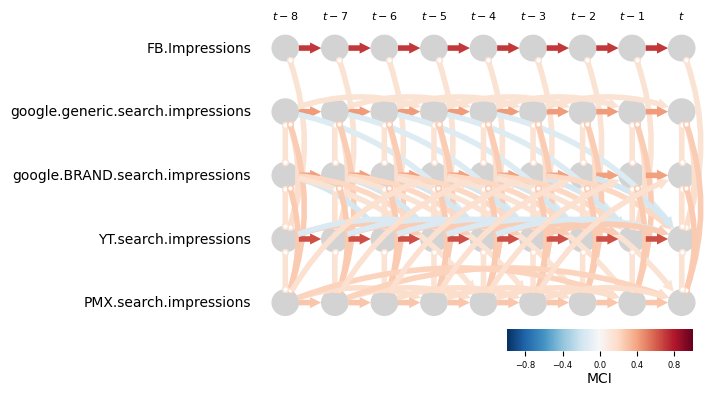

In [53]:
# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

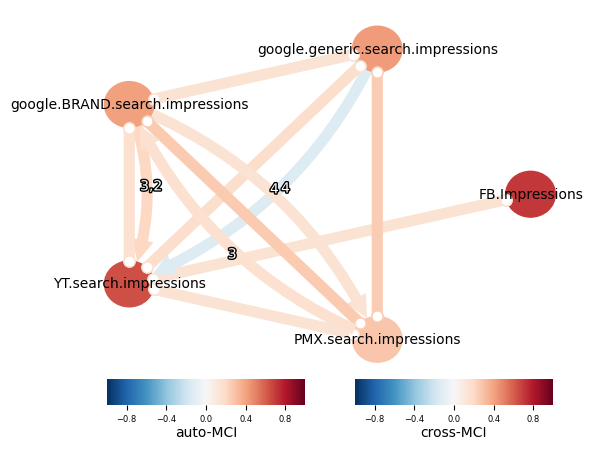

In [54]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()